# NASA TURBOFAN RUL PREDICTION

Reading the readme.txt, this dataset consists in 100 engines that failed at some point, being all of them from the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user.   
The engine is operating normally at the start of each time series, and develops a fault at some point during the series. 
In the training set, the fault grows in magnitude until system failure. In the test set, the time series ends some time prior to system 
failure. The objective of the competition is to predict the number of remaining operational cycles before failure in the test set, i.e., 
the number of operational cycles after the last cycle that the engine will continue to operate. 
Also provided a vector of true Remaining Useful Life (RUL) values for the test data.

## Data Preprocessing - Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the datasets:   
Meaning of each column:   
- Unit number   
- Time, in cicles   
- Operational Setting 1   
- Operational Setting 2   
- Operational Setting 3   
- sensor measurement 1   
...   
- sensor measurement 21

In [2]:
train_df = pd.read_csv('../raw_data/train_FD001.txt', sep = " ", header = None).drop(columns = [26,27])
print(train_df.shape)
train_df.head(5)

(20631, 26)


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [3]:
columns = {0:'unit_number',1:'cycle_number',2:'op1',3:'op2', 4:'op3',5:'sensor1',6:'sensor2',
           7:'sensor3',8:'sensor4',9:'sensor5',10:'sensor6',11:'sensor7',12:'sensor8',13:'sensor9',14:'sensor10',
           15:'sensor11',16:'sensor12',17:'sensor13',18:'sensor14',19:'sensor15',20:'sensor16',
           21:'sensor17',22:'sensor18',23:'sensor19',24:'sensor20',25:'sensor21'}

In [4]:
train_df.rename(columns = columns, inplace = True)
train_df.head(2)

,unit_number,cycle_number,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236


### Calculating our RUL (Remaining Useful Life) for each line

Since we know that for each unit_number, the last row with the same number represents the number of the last cycle of an engine, we can subtract the total to each cycle to obtain the RUL for each line.

In [5]:
train_df.unit_number.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

Seeing the Engines lifetime:

In [6]:
life_time = train_df.groupby('unit_number')['cycle_number'].max()
life_time

unit_number
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Name: cycle_number, Length: 100, dtype: int64

In [7]:
life_time = life_time.reset_index()
life_time

,unit_number,cycle_number
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
...,...,...
95,96,336
96,97,202
97,98,156
98,99,185


<AxesSubplot:xlabel='cycle_number', ylabel='unit_number'>

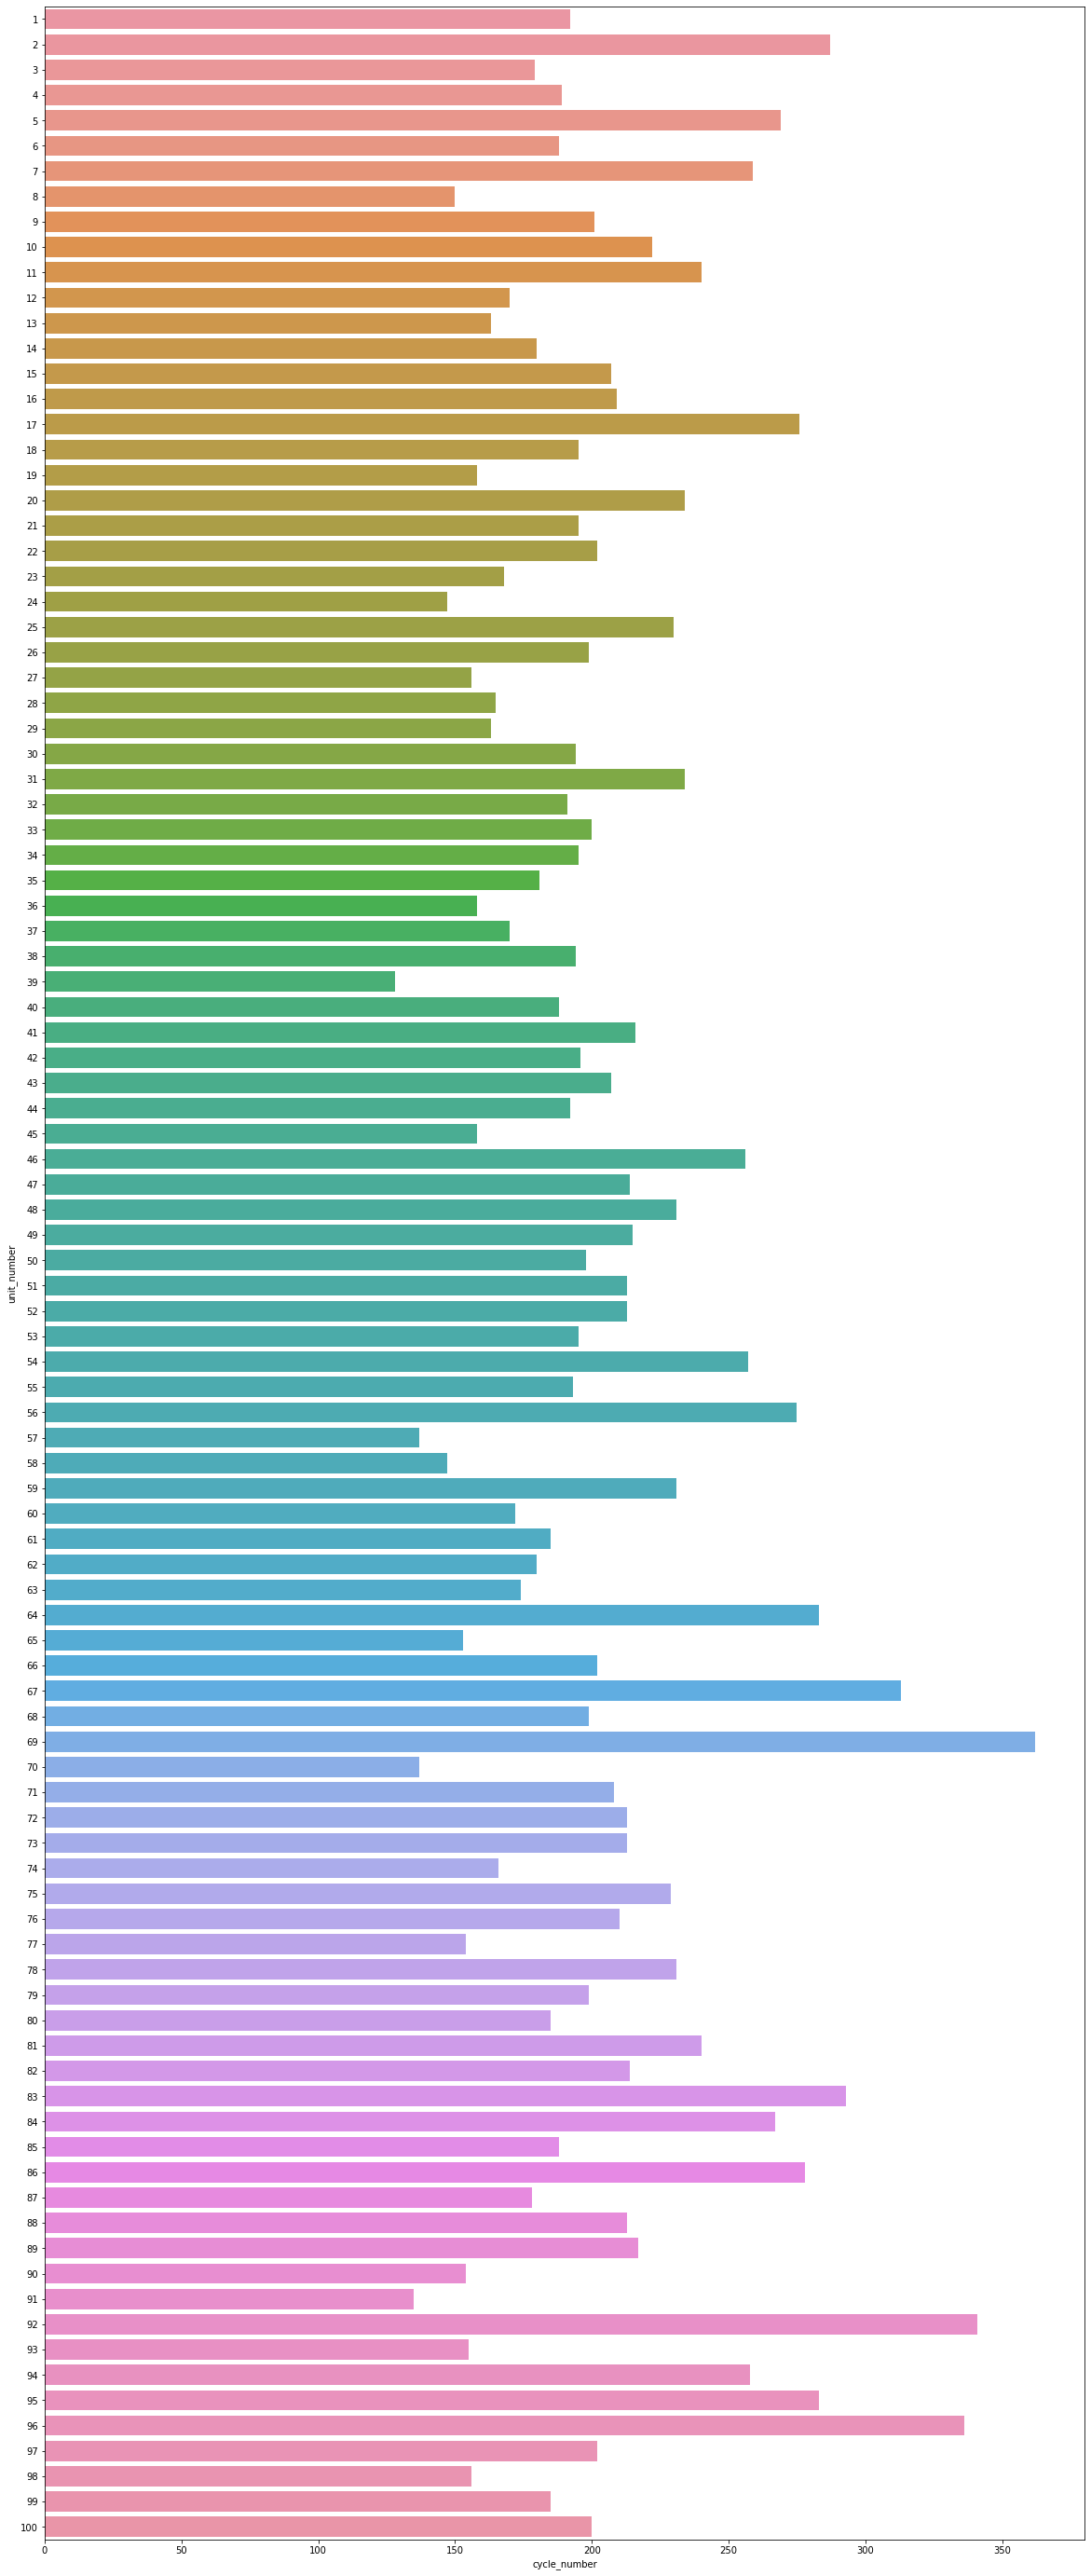

In [8]:
fig = plt.figure(figsize=(20,50))
sns.barplot(x = life_time['cycle_number'], y = life_time['unit_number'], orient = 'h')

In [9]:
train_df['rul'] = train_df.groupby(['unit_number'])['cycle_number'].transform(max) - train_df['cycle_number']
train_df.head(4)

,unit_number,cycle_number,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,rul
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188


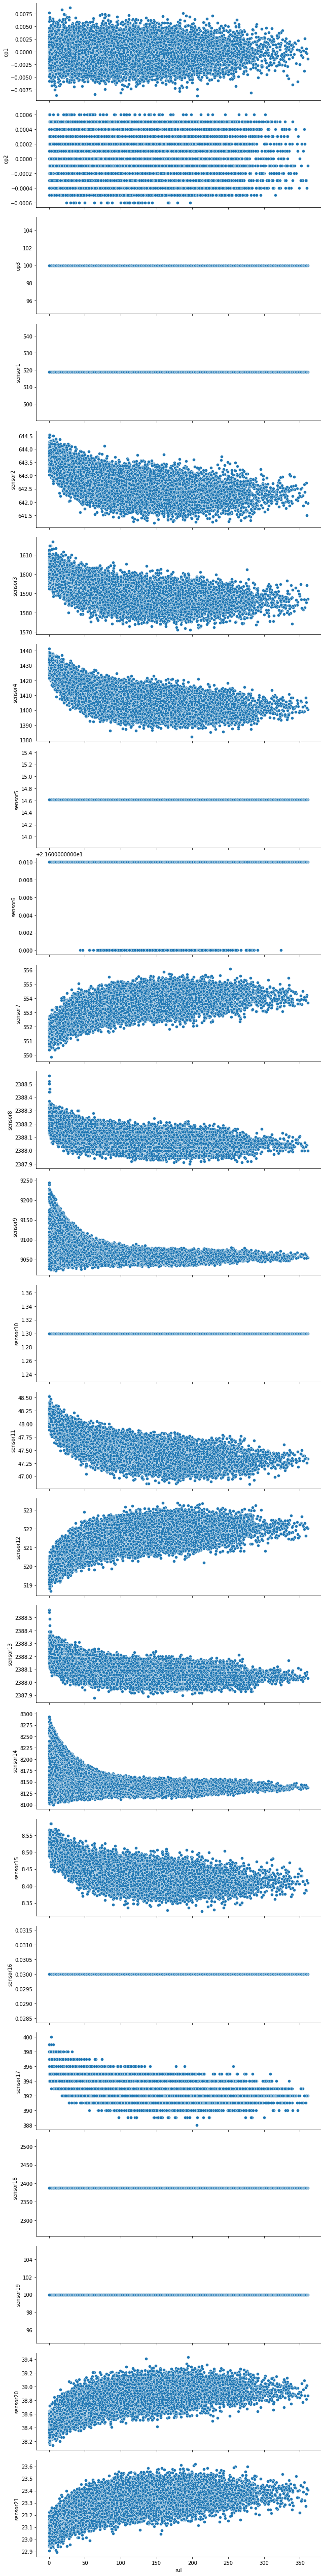

In [10]:
sns.pairplot(data=train_df, x_vars = 'rul', y_vars = train_df.drop(columns = ['unit_number','cycle_number','rul']), height = 3, aspect = 3)

After seeing the last plot, we can see that there is a lot features that are constant all time, so we can drop them since they don't have impact on our data. But first, we are going to clean our data.

### Duplicates

In [11]:
train_df.duplicated().sum()

0

There are no duplicates in this df.

### Missing values

In [12]:
train_df.isnull().sum()

unit_number     0
cycle_number    0
op1             0
op2             0
op3             0
sensor1         0
sensor2         0
sensor3         0
sensor4         0
sensor5         0
sensor6         0
sensor7         0
sensor8         0
sensor9         0
sensor10        0
sensor11        0
sensor12        0
sensor13        0
sensor14        0
sensor15        0
sensor16        0
sensor17        0
sensor18        0
sensor19        0
sensor20        0
sensor21        0
rul             0
dtype: int64

There are no missing values in this df.

### Dropping irrelevant features   
Dropping all irrelevant features that we can see in pairplot.

In [13]:
train_df.drop(columns = ['unit_number','cycle_number','op3','sensor1','sensor5','sensor6','sensor10','sensor16','sensor18','sensor19'], inplace = True)

## EDA - Exploratory Data Analysis

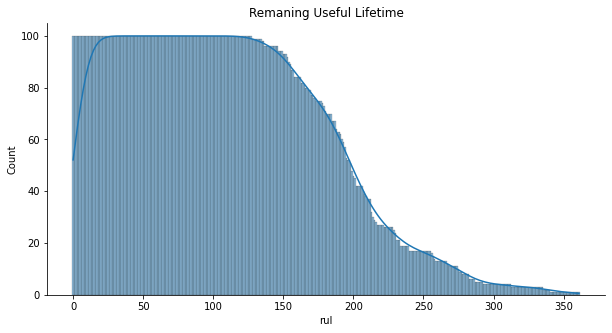

In [14]:
def plot_dist(series=train_df["rul"], title="Remaning Useful Lifetime"):
    fig, axs = plt.subplots(figsize = [10,5])
    sns.histplot(series, kde=True, discrete=True, ax = axs)
    sns.despine()
    plt.title(title);
    plt.show()
plot_dist()

### Exploring features   
Numerical features:

In [29]:
train_df.columns

Index(['op1', 'op2', 'sensor2', 'sensor3', 'sensor4', 'sensor7', 'sensor8',
       'sensor9', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15',
       'sensor17', 'sensor20', 'sensor21', 'rul'],
      dtype='object')

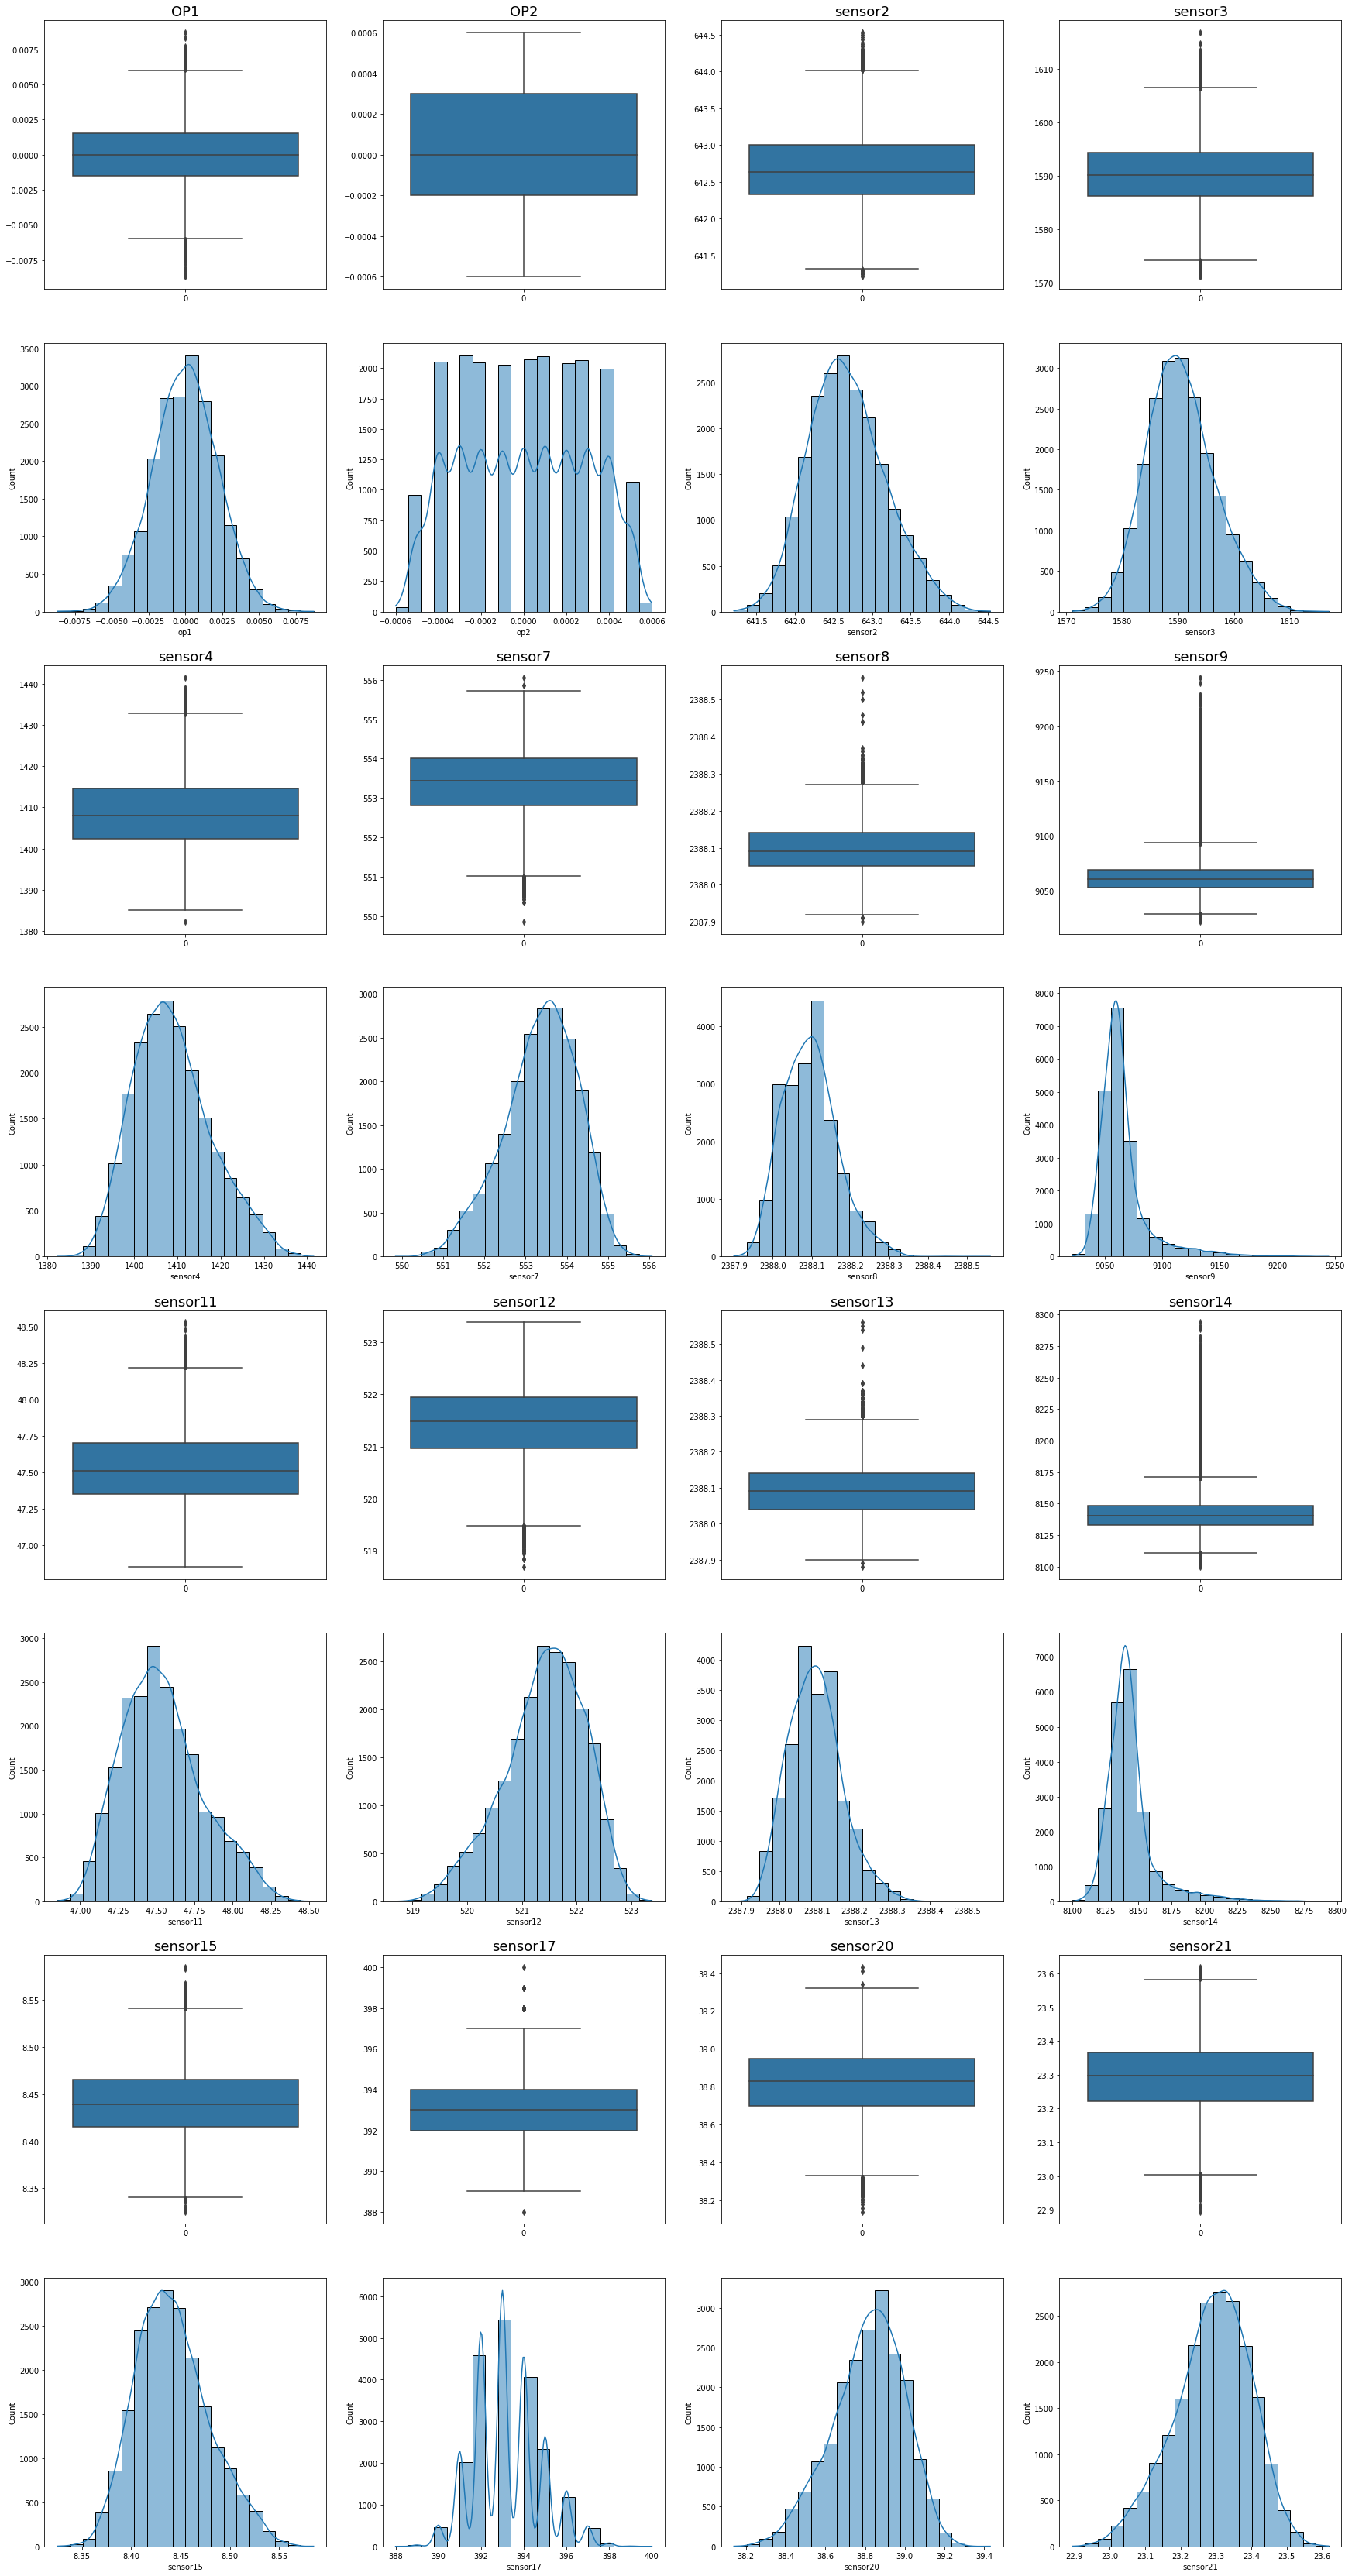

In [37]:
fig, axs = plt.subplots(8, 4, figsize=(30,60))



#OP1
axs[0,0].set_title( "OP1" , size = 18 )
sns.boxplot(data=train_df.op1, ax = axs[0,0])
sns.histplot(data = train_df.op1, ax = axs[1,0], bins = 20, kde = True)

#OP2
axs[0,1].set_title( "OP2" , size = 18 )
sns.boxplot(data=train_df.op2, ax = axs[0,1])
sns.histplot(data = train_df.op2, ax = axs[1,1], bins = 20, kde = True)

#sensor2
axs[0,2].set_title( "sensor2" , size = 18 )
sns.boxplot(data=train_df.sensor2, ax = axs[0,2])
sns.histplot(data = train_df.sensor2, ax = axs[1,2], bins = 20, kde = True)

#sensor3
axs[0,3].set_title( "sensor3" , size = 18 )
sns.boxplot(data=train_df.sensor3, ax = axs[0,3])
sns.histplot(data = train_df.sensor3, ax = axs[1,3], bins = 20, kde = True)

#sensor4
axs[2,0].set_title( "sensor4" , size = 18 )
sns.boxplot(data=train_df.sensor4, ax = axs[2,0])
sns.histplot(data = train_df.sensor4, ax = axs[3,0], bins = 20, kde = True)

#sensor7
axs[2,1].set_title( "sensor7" , size = 18 )
sns.boxplot(data=train_df.sensor7, ax = axs[2,1])
sns.histplot(data = train_df.sensor7, ax = axs[3,1], bins = 20, kde = True)

#sensor8
axs[2,2].set_title( "sensor8" , size = 18 )
sns.boxplot(data=train_df.sensor8, ax = axs[2,2])
sns.histplot(data = train_df.sensor8, ax = axs[3,2], bins = 20, kde = True)

#sensor9
axs[2,3].set_title( "sensor9" , size = 18 )
sns.boxplot(data=train_df.sensor9, ax = axs[2,3])
sns.histplot(data = train_df.sensor9, ax = axs[3,3], bins = 20, kde = True)

#sensor11
axs[4,0].set_title( "sensor11" , size = 18 )
sns.boxplot(data=train_df.sensor11, ax = axs[4,0])
sns.histplot(data = train_df.sensor11, ax = axs[5,0], bins = 20, kde = True)

#sensor12
axs[4,1].set_title( "sensor12" , size = 18 )
sns.boxplot(data=train_df.sensor12, ax = axs[4,1])
sns.histplot(data = train_df.sensor12, ax = axs[5,1], bins = 20, kde = True)

#sensor13
axs[4,2].set_title( "sensor13" , size = 18 )
sns.boxplot(data=train_df.sensor13, ax = axs[4,2])
sns.histplot(data = train_df.sensor13, ax = axs[5,2], bins = 20, kde = True)

#sensor14
axs[4,3].set_title( "sensor14" , size = 18 )
sns.boxplot(data=train_df.sensor14, ax = axs[4,3])
sns.histplot(data = train_df.sensor14, ax = axs[5,3], bins = 20, kde = True)

#sensor15
axs[6,0].set_title( "sensor15" , size = 18 )
sns.boxplot(data=train_df.sensor15, ax = axs[6,0])
sns.histplot(data = train_df.sensor15, ax = axs[7,0], bins = 20, kde = True)

#sensor17
axs[6,1].set_title( "sensor17" , size = 18 )
sns.boxplot(data=train_df.sensor17, ax = axs[6,1])
sns.histplot(data = train_df.sensor17, ax = axs[7,1], bins = 20, kde = True)

#sensor20
axs[6,2].set_title( "sensor20" , size = 18 )
sns.boxplot(data=train_df.sensor20, ax = axs[6,2])
sns.histplot(data = train_df.sensor20, ax = axs[7,2], bins = 20, kde = True)

#sensor21
axs[6,3].set_title( "sensor21" , size = 18 )
sns.boxplot(data=train_df.sensor21, ax = axs[6,3])
sns.histplot(data = train_df.sensor21, ax = axs[7,3], bins = 20, kde = True)


plt.show()

Since we have a lot of outliers, we are using MinMax Scaler to scale the numerical features.

### Feature Scaling